##Regresión Logistica

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
diabetes = pd.read_csv('/content/diabetes2.csv')

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes[['BMI', 'Outcome']].head()

,BMI,Outcome
0,33.6,1
1,26.6,0
2,23.3,1
3,28.1,0
4,43.1,1


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


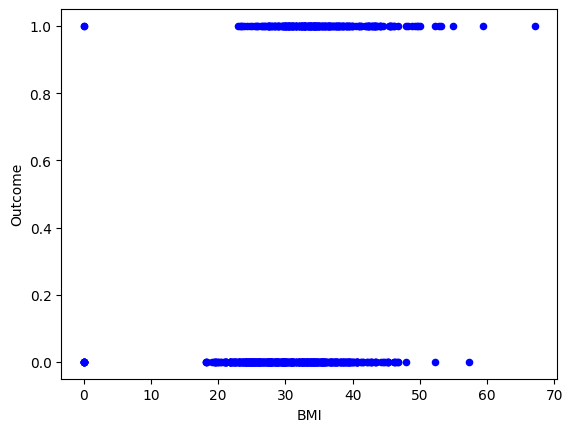

In [ ]:
diabetes.plot.scatter(x = 'BMI', y = 'Outcome', c = 'b')
plt.show()

In [ ]:
#Parametros al ojo
w = 0.09 
b = -3.6

x = np.linspace(0, diabetes['BMI'].max(), 100) #Inicio, final, cantidad
y = 1/(1 + np.exp(-(w*x+b)))

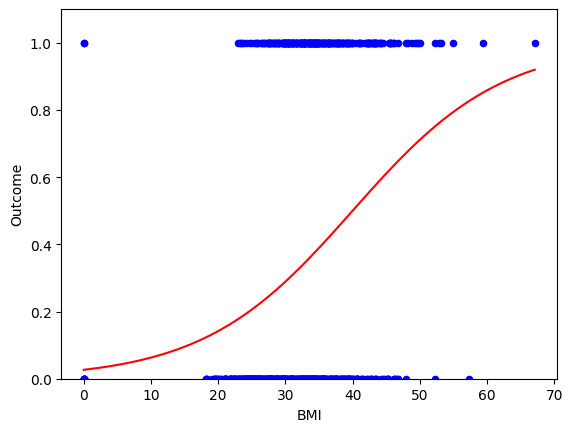

In [ ]:
diabetes.plot.scatter(x = 'BMI', y = 'Outcome', c = 'b')
plt.plot(x, y, '-r')
plt.ylim(0, diabetes['Outcome'].max()*1.1)
#plt.grid()
plt.show()

In [ ]:
diabetes['sigmoid'] = 1/(1 + np.exp(-(diabetes['BMI']*w+b)))

In [ ]:
diabetes['loss_xi'] = -diabetes['Outcome']*np.log(diabetes['sigmoid'])-(1 - diabetes['Outcome'])*np.log(1 - diabetes['sigmoid'])

In [ ]:
cost_j = diabetes['loss_xi'].mean()
cost_j

0.5995794663996212

In [ ]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T

In [ ]:
df = pd.DataFrame(data = array, columns = ['w', 'b'])

In [ ]:
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)


In [ ]:
df.head()

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96


In [ ]:
def sum_error_df(df):
  diabetes['sigmoid'] = 1/(1 + np.exp(-(diabetes['BMI']*df['w']+df['b'])))
  diabetes['loss_xi'] = -diabetes['Outcome']*np.log(diabetes['sigmoid'])-(1 - diabetes['Outcome'])*np.log(1 - diabetes['sigmoid'])
  j_cost = diabetes['loss_xi'].mean()
  return(j_cost)

In [ ]:
sum_error_df(df)

0.6853623107519287

In [ ]:
df['error'] = df.apply(sum_error_df, axis = 1)
df.sort_values(by = ['error']).head()

,w,b,error
443,0.09,-3.57,0.599480
444,0.09,-3.56,0.599488
442,0.09,-3.58,0.599492
445,0.09,-3.55,0.599517
441,0.09,-3.59,0.599526


In [ ]:
df_3d = df.pivot(index = 'w', columns = 'b', values = 'error')
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,0.875352,0.872746,0.870148,0.867558,0.864975,0.862401,0.859836,0.857278,0.854729,0.852189,...,0.681225,0.679636,0.678062,0.676503,0.674959,0.673431,0.671918,0.670420,0.668939,0.667473
0.06,0.788631,0.786338,0.784055,0.781783,0.779521,0.777270,0.775029,0.772800,0.770580,0.768372,...,0.633117,0.632082,0.631066,0.630067,0.629086,0.628124,0.627180,0.626254,0.625346,0.624457
0.07,0.714738,0.712845,0.710964,0.709097,0.707243,0.705403,0.703575,0.701761,0.699960,0.698173,...,0.606011,0.605615,0.605240,0.604886,0.604551,0.604238,0.603944,0.603672,0.603420,0.603188
0.08,0.656845,0.655442,0.654055,0.652683,0.651327,0.649988,0.648664,0.647356,0.646064,0.644788,...,0.602264,0.602568,0.602895,0.603243,0.603614,0.604006,0.604421,0.604857,0.605316,0.605797
0.09,0.617971,0.617142,0.616332,0.615539,0.614765,0.614009,0.613271,0.612551,0.611850,0.611168,...,0.623113,0.624146,0.625202,0.626280,0.627381,0.628504,0.629650,0.630819,0.632010,0.633224


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

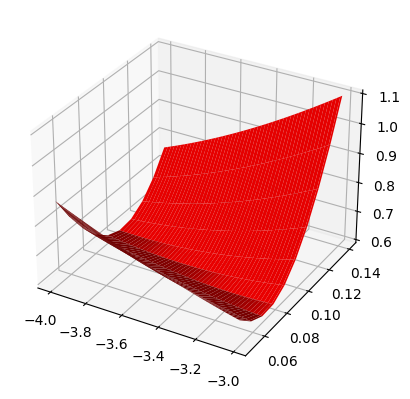

In [ ]:
x = df_3d.columns
y = df_3d.index
X, Y = np.meshgrid(x, y)
Z = df_3d
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z, color = 'r')
plt.show()

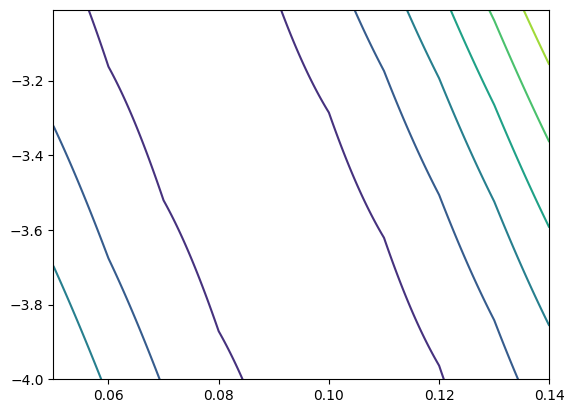

In [ ]:
#Diagrama de contorno
plt.contour(Y, X, Z)
plt.show()

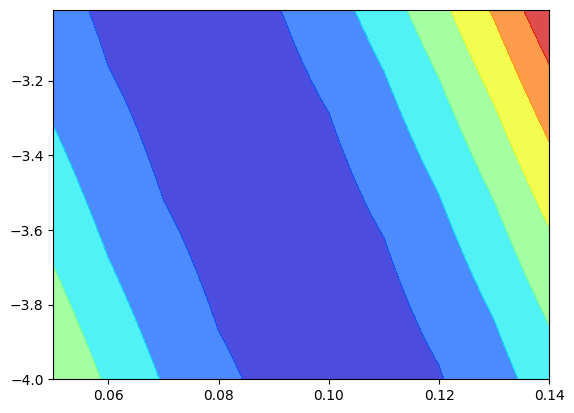

In [ ]:
#La misma en 3D pero plana, la parte gruesa es el minimo
plt.contourf(Y, X, Z, alpha = 0.7, cmap = plt.cm.jet)

In [ ]:
def delta_j_w(w, b):
  diabetes['sigmoid'] = 1/(1 + np.exp(-(diabetes['BMI']*w+b)))
  diabetes['partial_loss'] = (diabetes['sigmoid'] - diabetes['Outcome'])*diabetes['BMI']
  derivate = diabetes['partial_loss'].mean()
  return(derivate)

def delta_j_b(w, b):
  diabetes['sigmoid'] = 1/(1 + np.exp(-(diabetes['BMI']*w+b)))
  diabetes['partial_loss'] = (diabetes['sigmoid'] - diabetes['Outcome'])
  derivate = diabetes['partial_loss'].mean()
  return(derivate)

In [ ]:
w_0 = 0.09
b_0 = -3.57

In [ ]:
delta_j_w(w_0, b_0)

-0.03931387081545642

In [ ]:
delta_j_b(w_0, b_0)

-0.0002201804858235785

In [ ]:
alpha_w = 0.001
alpha_b = 0.1
w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)
w_0 = w_new
b_0 = b_new
w_0 = np.round(w_0, 5)
b_0 = np.round(b_0, 5)
print(w_0, b_0)

0.09009 -3.57002


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_diabetes = np.array(diabetes['BMI']).reshape((-1, 1))
Y_diabetes = np.array(diabetes['Outcome'])

In [ ]:
model = LogisticRegression()
model.fit(X_diabetes, Y_diabetes)

LogisticRegression()

In [ ]:
print(f' la pendiente (w) es {model.coef_}''\n',f'el intercepto (b) es {model.intercept_}')

 la pendiente (w) es [[0.09351691]]
 el intercepto (b) es [-3.68596089]
